Temporal Patterns Per Governorate

In [1]:
"""


لكل محافظة، شوف كيف تغيّر عدد الحوادث وأنواع العنف على مدار السنوات.
هل في محافظة معينة زاد فيها نوع عنف محدد بسنوات معينة؟
هل في محافظة كانت هادئة، وفجأة صار فيها تصاعد خطير؟

هدف بناء Timeline لكل محافظة، يوضح كيف تغيرت الأوضاع فيها مع الزمن.

"""

'\n\n\nلكل محافظة، شوف كيف تغيّر عدد الحوادث وأنواع العنف على مدار السنوات.\nهل في محافظة معينة زاد فيها نوع عنف محدد بسنوات معينة؟\nهل في محافظة كانت هادئة، وفجأة صار فيها تصاعد خطير؟\n\nهدف بناء Timeline لكل محافظة، يوضح كيف تغيرت الأوضاع فيها مع الزمن.\n\n'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
scipy.stats.norm(0, 1)


In [2]:
dt = pd.read_csv(r'/mnt/c/Users/asus/PyCharmMiscProject/syria.csv')

/tmp/ipykernel_10693/1522234943.py:1: DtypeWarning: Columns (2,29,30,45) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv(r'/mnt/c/Users/asus/PyCharmMiscProject/syria.csv')


In [3]:
dt= dt.drop([0])

In [4]:
dt['year'] = dt['year'].astype('float64')

In [5]:
dt = dt.sort_values(by='year',ascending=True)

In [6]:
dt = dt.reset_index(drop = True)

In [15]:
dt.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,177142.0,ISR-2004-1-381-1998,2004.0,1.0,Clear,1.0,234.0,234.0,Israel: Palestine,477.0,...,00:00.0,0.0,1.0,0.0,0.0,1,1.0,1.0,666.0,NaN
1,186185.0,SYR-2004-3-652-1,2004.0,0.0,Clear,3.0,118.0,711.0,Government of Syria - Civilians,118.0,...,00:00.0,0.0,0.0,4.0,0.0,4,4.0,4.0,652.0,NaN
2,186184.0,SYR-2004-3-652-0,2004.0,0.0,Clear,3.0,118.0,711.0,Government of Syria - Civilians,118.0,...,00:00.0,0.0,0.0,3.0,0.0,3,3.0,3.0,652.0,NaN
3,179949.0,ISR-2008-1-643-3046,2008.0,0.0,Clear,1.0,426.0,426.0,Israel: Southern Lebanon,891.0,...,00:00.0,0.0,1.0,0.0,0.0,1,1.0,1.0,666.0,NaN
4,186478.0,SYR-2011-1-867-101,2011.0,1.0,Clear,1.0,299.0,299.0,Syria: Government,11973.0,...,00:00.0,0.0,0.0,5.0,0.0,5,5.0,5.0,652.0,NaN


In [16]:
dt_sepdate = dt['source_date'].str.split(';',expand=True).stack().reset_index(drop=True).to_frame('source_date')

In [17]:
#merge on the index
dates_splt =(dt_sepdate).merge(dt,left_index =True,right_index= True)

In [18]:
dates_splt.head(10)

,source_date_x,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,3/16/2004,177142.0,ISR-2004-1-381-1998,2004.0,1.0,Clear,1.0,234.0,234.0,Israel: Palestine,...,00:00.0,0.0,1.0,0.0,0.0,1,1.0,1.0,666.0,NaN
1,3/16/2004,186185.0,SYR-2004-3-652-1,2004.0,0.0,Clear,3.0,118.0,711.0,Government of Syria - Civilians,...,00:00.0,0.0,0.0,4.0,0.0,4,4.0,4.0,652.0,NaN
2,8/26/2011,186184.0,SYR-2004-3-652-0,2004.0,0.0,Clear,3.0,118.0,711.0,Government of Syria - Civilians,...,00:00.0,0.0,0.0,3.0,0.0,3,3.0,3.0,652.0,NaN
3,8/25/2011,179949.0,ISR-2008-1-643-3046,2008.0,0.0,Clear,1.0,426.0,426.0,Israel: Southern Lebanon,...,00:00.0,0.0,1.0,0.0,0.0,1,1.0,1.0,666.0,NaN
4,8/25/2011,186478.0,SYR-2011-1-867-101,2011.0,1.0,Clear,1.0,299.0,299.0,Syria: Government,...,00:00.0,0.0,0.0,5.0,0.0,5,5.0,5.0,652.0,NaN
5,8/25/2011,186239.0,SYR-2011-3-652-374,2011.0,1.0,Clear,3.0,118.0,711.0,Government of Syria - Civilians,...,00:00.0,0.0,0.0,3.0,0.0,3,3.0,3.0,652.0,NaN
6,8/25/2011,186275.0,SYR-2011-3-652-378,2011.0,1.0,Clear,3.0,118.0,711.0,Government of Syria - Civilians,...,00:00.0,0.0,0.0,1.0,0.0,1,1.0,1.0,652.0,NaN
7,8/25/2011,186221.0,SYR-2011-3-652-373,2011.0,1.0,Clear,3.0,118.0,711.0,Government of Syria - Civilians,...,00:00.0,0.0,0.0,1.0,0.0,1,1.0,1.0,652.0,NaN
8,8/23/2011,187240.0,SYR-2011-3-652-371,2011.0,1.0,Clear,3.0,118.0,711.0,Government of Syria - Civilians,...,00:00.0,0.0,0.0,1.0,0.0,1,1.0,1.0,652.0,NaN
9,8/23/2011,187239.0,SYR-2011-3-652-370,2011.0,1.0,Clear,3.0,118.0,711.0,Government of Syria - Civilians,...,00:00.0,0.0,0.0,2.0,0.0,2,2.0,2.0,652.0,NaN


In [24]:
dates_splt.dtypes

source_date_x         object
id                   float64
year                 float64
active_year          float64
type_of_violence     float64
conflict_dset_id     float64
conflict_new_id      float64
conflict_name         object
dyad_dset_id         float64
dyad_new_id          float64
dyad_name             object
side_a_dset_id       float64
side_a_new_id        float64
side_a                object
side_b_dset_id       float64
side_b_new_id        float64
side_b                object
number_of_sources    float64
source_article        object
source_office         object
source_date_y         object
source_headline       object
source_original       object
where_prec           float64
where_coordinates     object
latitude              object
longitude             object
priogrid_gid         float64
iso3                  object
event_clarity        float64
date_prec            float64
deaths_a             float64
deaths_b             float64
deaths_civilians     float64
deaths_unknown

In [25]:
dates_splt.drop(columns= 'source_date_y')

,source_date_x,id,year,active_year,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,...,iso3,event_clarity,date_prec,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
0,3/16/2004,177142.0,2004.0,1.0,1.0,234.0,234.0,Israel: Palestine,477.0,477.0,...,SYR,1.0,1.0,0.0,1.0,0.0,0.0,1,1.0,1.0
1,3/16/2004,186185.0,2004.0,0.0,3.0,118.0,711.0,Government of Syria - Civilians,118.0,1178.0,...,SYR,1.0,1.0,0.0,0.0,4.0,0.0,4,4.0,4.0
2,8/26/2011,186184.0,2004.0,0.0,3.0,118.0,711.0,Government of Syria - Civilians,118.0,1178.0,...,SYR,1.0,1.0,0.0,0.0,3.0,0.0,3,3.0,3.0
3,8/25/2011,179949.0,2008.0,0.0,1.0,426.0,426.0,Israel: Southern Lebanon,891.0,891.0,...,SYR,1.0,1.0,0.0,1.0,0.0,0.0,1,1.0,1.0
4,8/25/2011,186478.0,2011.0,1.0,1.0,299.0,299.0,Syria: Government,11973.0,11973.0,...,SYR,1.0,1.0,0.0,0.0,5.0,0.0,5,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86750,2015-08-31,504452.0,2023.0,1.0,2.0,16135.0,14803.0,SNA - SDF,16135.0,16135.0,...,SYR,1.0,1.0,0.0,2.0,0.0,0.0,2,2.0,2.0
86751,2015-08-31,503998.0,2023.0,1.0,2.0,16135.0,14803.0,SNA - SDF,16135.0,16135.0,...,SYR,1.0,1.0,0.0,1.0,0.0,0.0,1,1.0,1.0
86752,8/30/2015,503871.0,2023.0,1.0,2.0,16135.0,14803.0,SNA - SDF,16135.0,16135.0,...,SYR,2.0,2.0,0.0,2.0,0.0,0.0,2,2.0,2.0
86753,2016-01-18,461044.0,2023.0,1.0,1.0,299.0,299.0,Syria: Government,11973.0,11973.0,...,SYR,1.0,1.0,1.0,0.0,0.0,0.0,1,1.0,1.0


In [21]:
dates_splt= dates_splt.drop(['gwnob','where_description','adm_1','adm_2','gwnoa','relid','geom_wkt','date_start','date_end','country','country_id','region','code_status'], axis= 1)

In [22]:
SYR_lands = ['Deir ez Zor','Hamah','Al Hasakah','Idlib', 'Quneitra','Dimashq','Latakia','Aleppo','Damascus','As Suwayda','Daraa','Homs','Ar Raqqah','Tartus']
land_type = ['governorate',"city",'town','Road','border','road',]

In [23]:
hama_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Hamah') &
    dates_splt['where_coordinates'].str.contains(land_type[0])
]

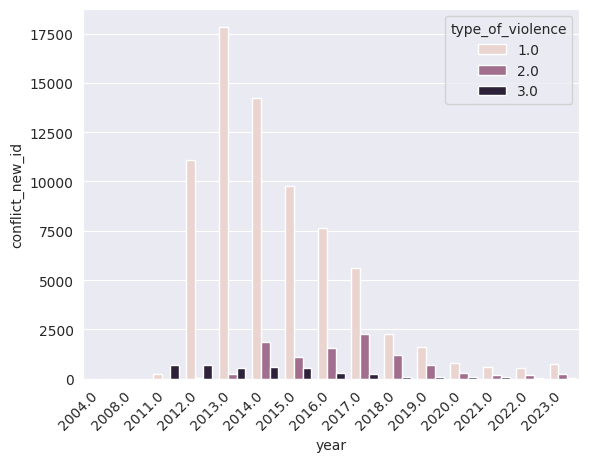

In [38]:
#numberr of conflicts per year
summar_df= dates_splt.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.barplot(x= 'year', y= 'conflict_new_id', data = summar_df,hue= "type_of_violence")
plt.xticks(rotation=45,ha='right')
plt.show()

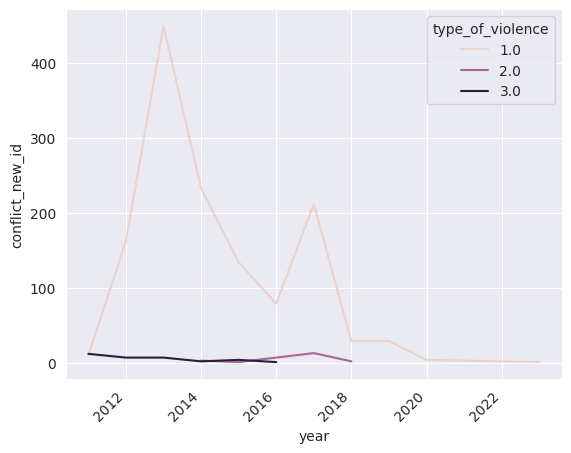

In [17]:
#how to find number of conficts in yearly
hama_yr= hama_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = hama_yr,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')
plt.show()

In [18]:
hama_yr

,year,type_of_violence,conflict_new_id
0,2011.0,1.0,11
1,2011.0,3.0,12
2,2012.0,1.0,162
3,2012.0,3.0,7
4,2013.0,1.0,449
5,2013.0,3.0,7
6,2014.0,1.0,233
7,2014.0,2.0,3
8,2014.0,3.0,2
9,2015.0,1.0,134


In [33]:
Idlib_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Idlib') &
    dates_splt['where_coordinates'].str.contains(land_type[0])
]

In [ ]:
#how to find number of conficts in yearly
idlib_yr= Idlib_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
total_count_type_1_violence =
sns.lineplot(x= 'year', y= 'conflict_new_id', data = idlib_yr,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')
plt.show()

In [ ]:
idlib_yr
#

In [22]:
Deyrzor_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Deir ez Zor') &
    dates_splt['where_coordinates'].str.contains(land_type[0])
]

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

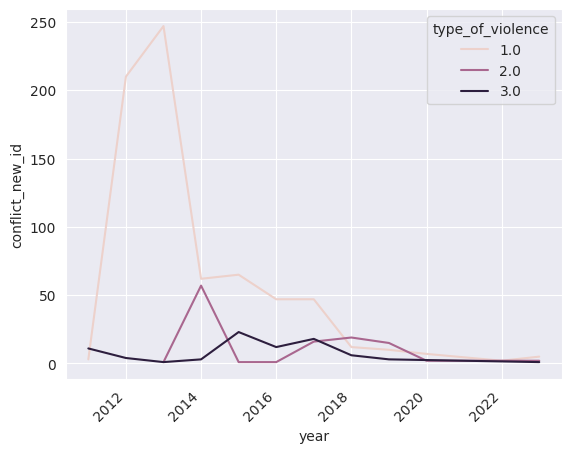

In [23]:
DZ_yr= Deyrzor_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = DZ_yr,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')

In [24]:
DZ_yr
#from 2011 - 2013 type 1 violence related conflicts increased from 3 counts to 247

,year,type_of_violence,conflict_new_id
0,2011.0,1.0,3
1,2011.0,3.0,11
2,2012.0,1.0,210
3,2012.0,3.0,4
4,2013.0,1.0,247
5,2013.0,2.0,1
6,2013.0,3.0,1
7,2014.0,1.0,62
8,2014.0,2.0,57
9,2014.0,3.0,3


In [25]:
Damaascus_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Dimashq') &
    dates_splt['where_coordinates'].str.contains(land_type[0])
]

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

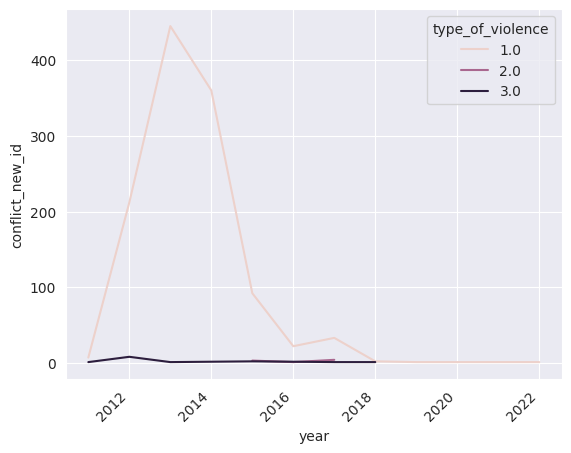

In [26]:
Damask_yr= Damaascus_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = Damask_yr,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')

In [27]:
Damask_yr

,year,type_of_violence,conflict_new_id
0,2011.0,1.0,7
1,2011.0,3.0,1
2,2012.0,1.0,212
3,2012.0,3.0,8
4,2013.0,1.0,445
5,2013.0,3.0,1
6,2014.0,1.0,360
7,2015.0,1.0,92
8,2015.0,2.0,3
9,2015.0,3.0,2


In [28]:
DARAA_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Daraa') &
    dates_splt['where_coordinates'].str.contains(land_type[0])
]

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

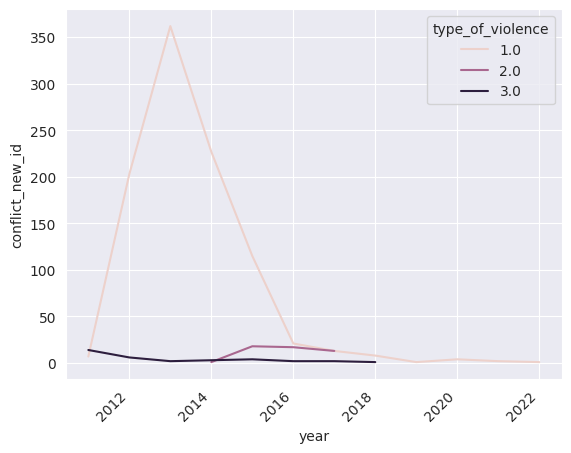

In [29]:
Daraayr= DARAA_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = Daraayr,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')

In [30]:
Daraayr

,year,type_of_violence,conflict_new_id
0,2011.0,1.0,7
1,2011.0,3.0,14
2,2012.0,1.0,203
3,2012.0,3.0,6
4,2013.0,1.0,362
5,2013.0,3.0,2
6,2014.0,1.0,227
7,2014.0,2.0,1
8,2015.0,1.0,115
9,2015.0,2.0,18


In [31]:
Homs_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Homs') &
    dates_splt['where_coordinates'].str.contains(land_type[0])
]

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

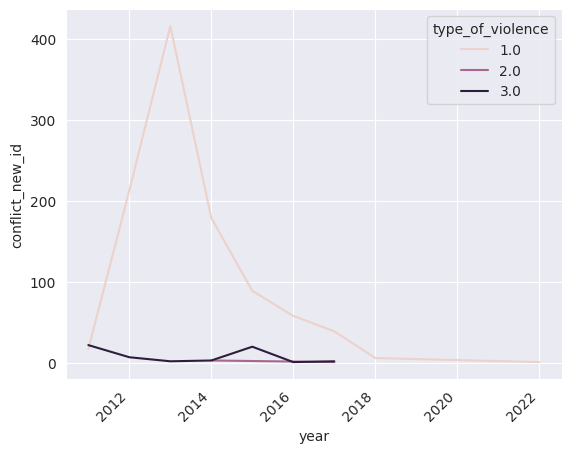

In [32]:
Homs_yr= Homs_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = Homs_yr,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')

In [33]:
Homs_yr

,year,type_of_violence,conflict_new_id
0,2011.0,1.0,17
1,2011.0,3.0,22
2,2012.0,1.0,213
3,2012.0,3.0,7
4,2013.0,1.0,416
5,2013.0,3.0,2
6,2014.0,1.0,179
7,2014.0,2.0,3
8,2014.0,3.0,3
9,2015.0,1.0,89


In [34]:
Aleppo_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Aleppo') &
    dates_splt['where_coordinates'].str.contains(land_type[0])
]

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

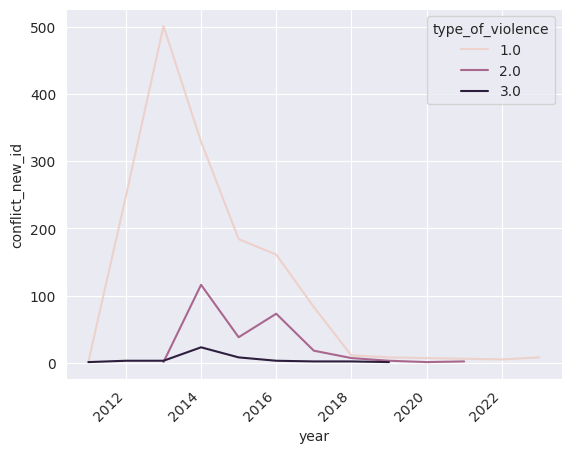

In [35]:
Aleppo_yr= Aleppo_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = Aleppo_yr,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')

In [36]:
Aleppo_yr

,year,type_of_violence,conflict_new_id
0,2011.0,1.0,1
1,2011.0,3.0,1
2,2012.0,1.0,248
3,2012.0,3.0,3
4,2013.0,1.0,501
5,2013.0,2.0,1
6,2013.0,3.0,3
7,2014.0,1.0,329
8,2014.0,2.0,116
9,2014.0,3.0,23


In [37]:
Raqqa_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Raqqa') &
    dates_splt['where_coordinates'].str.contains(land_type[0])
]

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

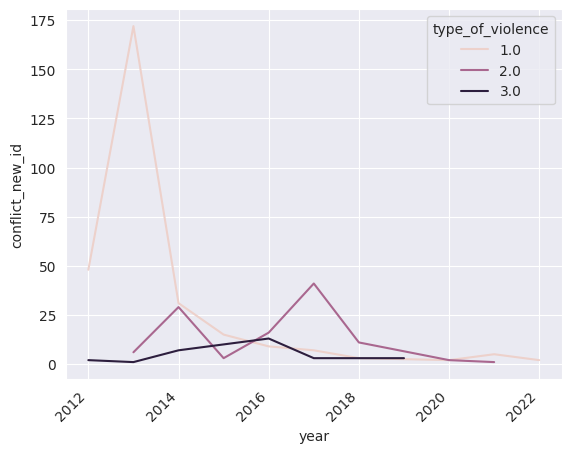

In [38]:
RAQA_yr= Raqqa_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = RAQA_yr,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')

In [39]:
hasakah_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Al Hasakah') &
    dates_splt['where_coordinates'].str.contains(land_type[0])
]

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

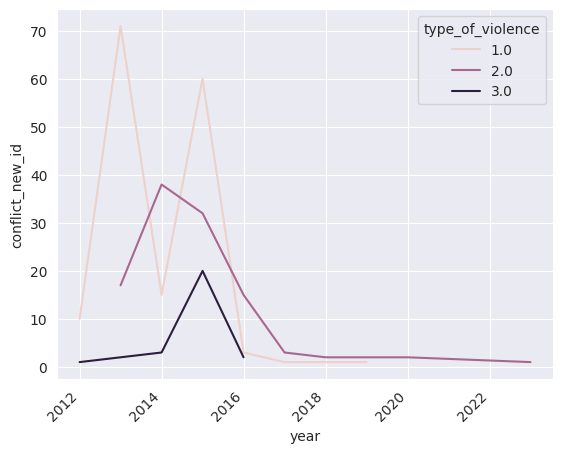

In [40]:
hasakah_yr= hasakah_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = hasakah_yr,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

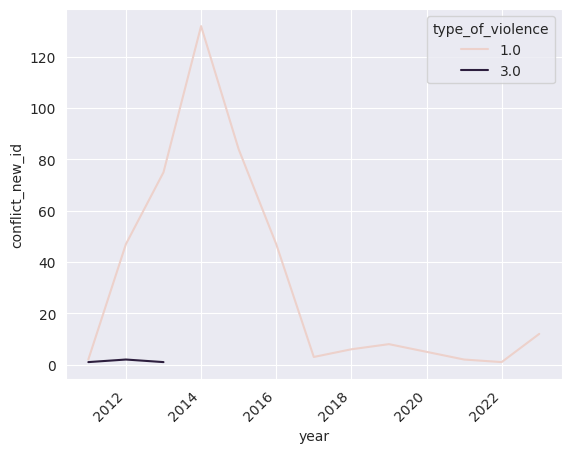

In [41]:
#Latakia
latakia_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Latakia') &
    dates_splt['where_coordinates'].str.contains(land_type[0])
]

plt.xticks(rotation=45, ha='right')
latakyr_df = latakia_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = latakyr_df,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')

In [47]:
latakyr_df

,year,type_of_violence,conflict_new_id
0,2011.0,1.0,2
1,2011.0,3.0,1
2,2012.0,1.0,47
3,2012.0,3.0,2
4,2013.0,1.0,75
5,2013.0,3.0,1
6,2014.0,1.0,132
7,2015.0,1.0,84
8,2016.0,1.0,47
9,2017.0,1.0,3


In [42]:
#Latakia
Damascus_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Damascus') & dates_splt['where_coordinates'].str.contains(land_type[1])
]



(array([2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. , 2017.5, 2020. ,
        2022.5, 2025. ]),
 [Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5'),
  Text(2020.0, 0, '2020.0'),
  Text(2022.5, 0, '2022.5'),
  Text(2025.0, 0, '2025.0')])

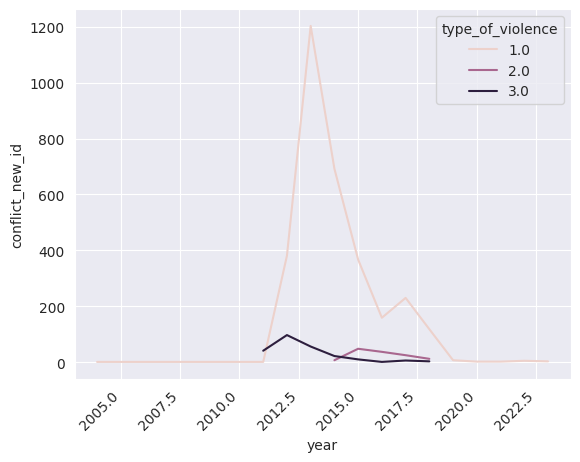

In [43]:
plt.xticks(rotation=45, ha='right')
damaskyr_df = Damascus_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = damaskyr_df,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')

In [44]:
damaskyr_df

,year,type_of_violence,conflict_new_id
0,2004.0,1.0,1
1,2008.0,1.0,1
2,2011.0,1.0,1
3,2011.0,3.0,41
4,2012.0,1.0,381
5,2012.0,3.0,97
6,2013.0,1.0,1203
7,2013.0,3.0,56
8,2014.0,1.0,692
9,2014.0,2.0,7


In [45]:
#As Suwayda
asyawda_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('As Suwayda') & dates_splt['where_coordinates'].str.contains(land_type[0])
]


(array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
        2020.]),
 [Text(2011.0, 0, '2011'),
  Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020')])

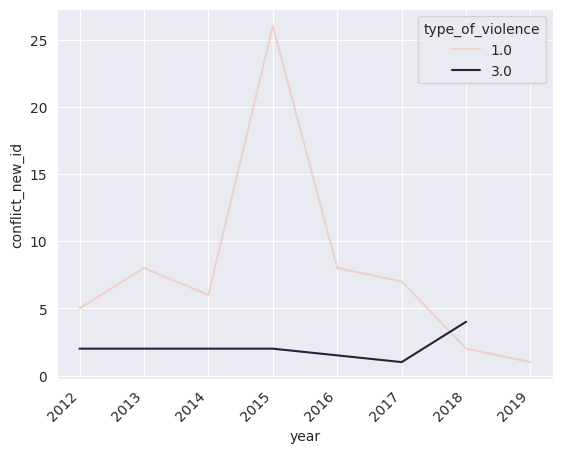

In [46]:
plt.xticks(rotation=45, ha='right')
asyawda_dfyr = asyawda_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = asyawda_dfyr,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')

In [46]:
#As Suwayda
tartus_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Tartus') & dates_splt['where_coordinates'].str.contains(land_type[0])
]

In [47]:
tartus_df

,source_date_x,id,year,active_year,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,...,iso3,event_clarity,date_prec,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
756,2012-09-23,267499.0,2011.0,1.0,3.0,118.0,711.0,Government of Syria - Civilians,118.0,1178.0,...,SYR,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1100,9/28/2012,334816.0,2012.0,1.0,1.0,299.0,299.0,Syria: Government,11973.0,11973.0,...,SYR,1.0,1.0,4.0,0.0,0.0,0.0,4.0,5.0,5.0
1936,9/23/2012,310839.0,2012.0,1.0,1.0,299.0,299.0,Syria: Government,11973.0,11973.0,...,SYR,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2852,2012-10-04,343716.0,2012.0,1.0,1.0,299.0,299.0,Syria: Government,11973.0,11973.0,...,SYR,1.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0
9452,2012-12-16,370272.0,2012.0,1.0,3.0,118.0,711.0,Government of Syria - Civilians,118.0,1178.0,...,SYR,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
9774,12/1/2012,272378.0,2012.0,1.0,3.0,118.0,711.0,Government of Syria - Civilians,118.0,1178.0,...,SYR,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
28759,2013-05-21,311098.0,2013.0,1.0,1.0,299.0,299.0,Syria: Government,11973.0,11973.0,...,SYR,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


(array([2010.75, 2011.  , 2011.25, 2011.5 , 2011.75, 2012.  , 2012.25,
        2012.5 , 2012.75, 2013.  , 2013.25]),
 [Text(2010.75, 0, '2010.75'),
  Text(2011.0, 0, '2011.00'),
  Text(2011.25, 0, '2011.25'),
  Text(2011.5, 0, '2011.50'),
  Text(2011.75, 0, '2011.75'),
  Text(2012.0, 0, '2012.00'),
  Text(2012.25, 0, '2012.25'),
  Text(2012.5, 0, '2012.50'),
  Text(2012.75, 0, '2012.75'),
  Text(2013.0, 0, '2013.00'),
  Text(2013.25, 0, '2013.25')])

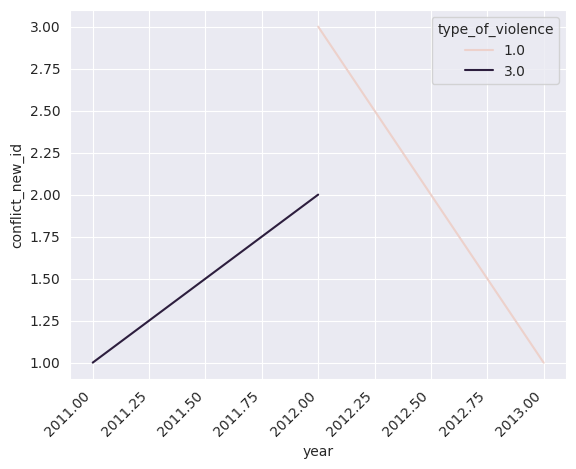

In [48]:
plt.xticks(rotation=45, ha='right')
tartos_dfyr = tartus_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = tartos_dfyr,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')

In [49]:
tartos_dfyr

,year,type_of_violence,conflict_new_id
0,2011.0,3.0,1
1,2012.0,1.0,3
2,2012.0,3.0,2
3,2013.0,1.0,1


In [50]:
#Quneitra
Quneitra_df = dates_splt[
    dates_splt['where_coordinates'].str.contains('Quneitra') & dates_splt['where_coordinates'].str.contains(land_type[0])
]

(array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
        2020.]),
 [Text(2011.0, 0, '2011'),
  Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020')])

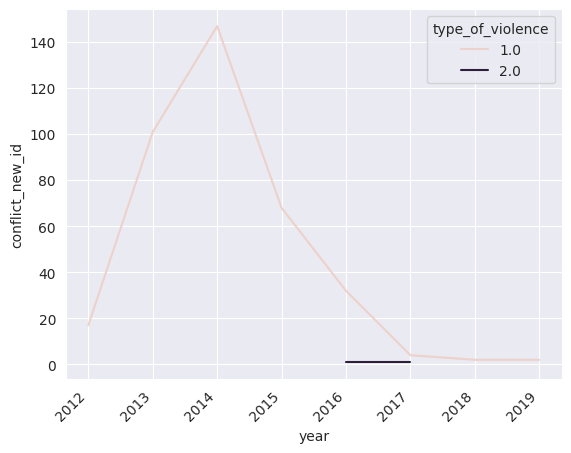

In [51]:
plt.xticks(rotation=45, ha='right')
qun_dfyr = Quneitra_df.groupby(['year','type_of_violence'])['conflict_new_id'].count().reset_index()
sns.lineplot(x= 'year', y= 'conflict_new_id', data = qun_dfyr,hue="type_of_violence")
plt.xticks(rotation=45,ha='right')

In [52]:

"""


لكل محافظة، شوف كيف تغيّر عدد الحوادث وأنواع العنف على مدار السنوات.
هل في محافظة معينة زاد فيها نوع عنف محدد بسنوات معينة؟
هل في محافظة كانت هادئة، وفجأة صار فيها تصاعد خطير؟

هدف بناء Timeline لكل محافظة، يوضح كيف تغيرت الأوضاع فيها مع الزمن.

"""

'\n\n\nلكل محافظة، شوف كيف تغيّر عدد الحوادث وأنواع العنف على مدار السنوات.\nهل في محافظة معينة زاد فيها نوع عنف محدد بسنوات معينة؟\nهل في محافظة كانت هادئة، وفجأة صار فيها تصاعد خطير؟\n\nهدف بناء Timeline لكل محافظة، يوضح كيف تغيرت الأوضاع فيها مع الزمن.\n\n'

In [53]:
# is it a good idea to have a dataframe for number of type 1 violence for all governorates


Actor Interactions Analysis
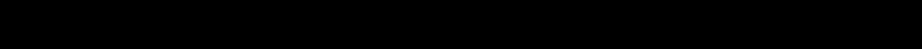
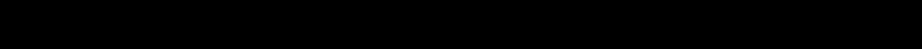

In [54]:
"""
شوف الأطراف يلي أكثر شي تكررت مع بعض بالنزاعات.
مثلاً: هل “الحكومة السورية” أكثر شي كانت ضد “داعش”؟ أم “المعارضة”؟ أم جهات ثانية؟
ارسم Matrix أو Network يوضح العلاقات
"""



'\nشوف الأطراف يلي أكثر شي تكررت مع بعض بالنزاعات.\nمثلاً: هل “الحكومة السورية” أكثر شي كانت ضد “داعش”؟ أم “المعارضة”؟ أم جهات ثانية؟\nارسم Matrix أو Network يوضح العلاقات\n'

In [55]:
from collections import Counter
import pandas as pd
dt["pair"] = dt.apply(lambda row: tuple(sorted([row["side_a"], row["side_b"]])), axis=1) #apply method applies func to every rw, sorted func to ensure that alphabetic sorting of events so that no false counts of same unsorted sides occur

In [56]:
dt["pair"]

0                   (Government of Israel, Hamas)
1                (Civilians, Government of Syria)
2                (Civilians, Government of Syria)
3               (Government of Israel, Hezbollah)
4        (Government of Syria, Syrian insurgents)
                           ...                   
86750                                  (SDF, SNA)
86751                                  (SDF, SNA)
86752                                  (SDF, SNA)
86753    (Government of Syria, Syrian insurgents)
86754         (Deir ez Zor Military Council, SDF)
Name: pair, Length: 86755, dtype: object

In [57]:
pair_cunts = dt["pair"].value_counts().reset_index()#reset_index converts the resulting series to dframe
pair_cunts.columns =["pair","count"]

In [58]:
pair_cunts

,pair,count
0,"(Government of Syria, Syrian insurgents)",65706
1,"(Government of Syria, IS)",6506
2,"(IS, SDF)",3756
3,"(Civilians, Government of Syria)",2122
4,"(Civilians, IS)",1353
...,...,...
112,"(Opponents of al-Assad, Supporters of al-Assad)",1
113,"(16th Division, Islamic Front, Jabhat Fateh al...",1
114,"(Government of Jordan, IS)",1
115,"(IS, Nour al-Din Zenki, Sham Legion)",1


In [59]:
# create count between sides
conflic_counts = dt.groupby(["side_a","side_b"]).size().reset_index(name="count")

#create conflict_matrix
confl_matr= pd.pivot_table(conflic_counts,index="side_a",columns="side_b",values="count",aggfunc="sum",fill_value=0.0)

confl_matr = confl_matr.add(confl_matr.T,fill_value=0.0)

In [60]:
confl_matr.fillna(0)

,"16th Division, Islamic Front, Jabhat Fateh al-Sham","23rd Division, Ahrar al-Sham, Jaysh al Nasr, Jaysh al-Nukhba, Nour al-Din Zenki, Sham Legion, SNA","23rd Division, Jaysh al Nasr, Jaysh al-Nukhba, Sham Legion, SNA, Syrian Liberation Front",Ahfad al Rasoul Brigade,"Ahfad al Rasoul Brigade, Ahrar al-Sham, IS, Islamic Kurdish Front, Jabhat Fateh al-Sham","Ahfad al Rasoul Brigade, Ahrar al-Sham, al-Farouq Brigades, Ghuraba al-Sham, IS, Jabhat Fateh al-Sham, Jazeera-Euphrates Liberation Front, Liwa al-Fateh",Ahrar Ghurayan,Ahrar al-Sham,"Ahrar al-Sham, FSA, HTS, Jaysh al-Islam","Ahrar al-Sham, Furqan Brigades, Jabhat Fateh al-Sham, Jaysh al-Islam, Yarmouk Army",...,"Suqour al-Sham, Syrian Liberation Front",Syrian Liberation Front,Syrian insurgents,Tahrir al- Sham Army,Tajamu Shuhada al-Sharqiya,Tanzim Hurras ad-Din,"al-Moutasem Brigade, Hamza Division","al-Qa'qa Brigade, Army of Ahl al-Sunni wal Jamaa , Army of al-Ikhlas, Army of Maoata al-Islami, Authenticity and Development Front, Bayareq al-Shaaitat , Islamic Front, Jabhat Fateh al-Sham, Jaish al-Muhajireen wal-Ansar, Liwa al-Qadisiya",al-Qaida,al-Tawhid Brigade
"16th Division, Islamic Front, Jabhat Fateh al-Sham",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"23rd Division, Ahrar al-Sham, Jaysh al Nasr, Jaysh al-Nukhba, Nour al-Din Zenki, Sham Legion, SNA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"23rd Division, Jaysh al Nasr, Jaysh al-Nukhba, Sham Legion, SNA, Syrian Liberation Front",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ahfad al Rasoul Brigade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Ahfad al Rasoul Brigade, Ahrar al-Sham, IS, Islamic Kurdish Front, Jabhat Fateh al-Sham",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tanzim Hurras ad-Din,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"al-Moutasem Brigade, Hamza Division",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"al-Qa'qa Brigade, Army of Ahl al-Sunni wal Jamaa , Army of al-Ikhlas, Army of Maoata al-Islami, Authenticity and Development Front, Bayareq al-Shaaitat , Islamic Front, Jabhat Fateh al-Sham, Jaish al-Muhajireen wal-Ansar, Liwa al-Qadisiya",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
al-Qaida,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Violence vs Geography
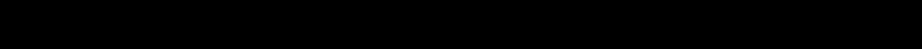

In [61]:
"""
هل في نوع عنف معين يتركز بمحافظات معينة؟
مثلاً، هل العنف من نوع 3 (ضد المدنيين) كان أكثر في دير الزور مثلاً، أو حلب؟
شوف التوزيع الجغرافي لأنواع العنف

"""

'\nهل في نوع عنف معين يتركز بمحافظات معينة؟\nمثلاً، هل العنف من نوع 3 (ضد المدنيين) كان أكثر في دير الزور مثلاً، أو حلب؟\nشوف التوزيع الجغرافي لأنواع العنف\n\n'

In [62]:
#How to create a function that counts the total number of violence types for every goverenate
df_type_1_violence = dates_splt[
(dates_splt["type_of_violence"] == 1.0) &
    dates_splt["where_coordinates"].str.contains(land_type[0])
]

In [63]:

typ1_dfyr = df_type_1_violence.groupby(['year',"where_coordinates"])['type_of_violence'].count().reset_index()

In [64]:
typ1_dfyr

,year,where_coordinates,type_of_violence
0,2011.0,Aleppo governorate,1
1,2011.0,Daraa governorate,7
2,2011.0,Deir ez Zor governorate,3
3,2011.0,Hamah governorate,11
4,2011.0,Homs governorate,17
...,...,...,...
287,2023.0,Idlib governorate,4
288,2023.0,Northern Latakia governorate,12
289,2023.0,Western Aleppo governorate,6
290,2023.0,Western Deir ez Zor governorate,1


In [65]:
typ1_dfyr.sort_values(by="type_of_violence",ascending=False,inplace=True)

In [66]:
typ1_dfyr

,year,where_coordinates,type_of_violence
31,2013.0,Aleppo governorate,483
53,2013.0,Rif Dimashq governorate,436
42,2013.0,Homs governorate,394
41,2013.0,Hamah governorate,375
34,2013.0,Daraa governorate,355
...,...,...,...
151,2016.0,Eastern Deir ez Zor governorate,1
141,2015.0,Western Aleppo governorate,1
138,2015.0,Southwestern Al Hasakah governorate,1
136,2015.0,Southern Quneitra governorate,1


In [67]:
#rename colum of type_of_violence to typ1viol
typ1_dfyr.rename(columns={"where_coordinates": "place", "type_of_violence": "typ1viol"}, inplace=True)

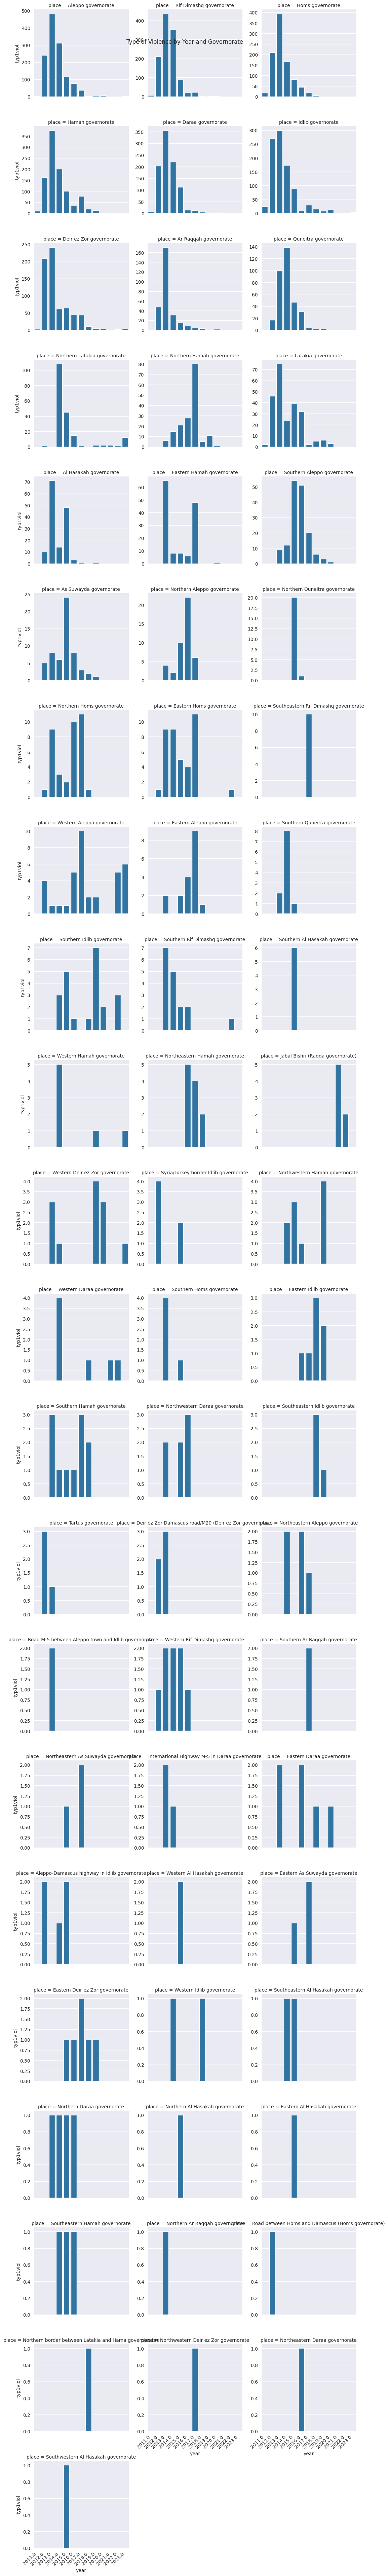

In [68]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create the FacetGrid
g = sns.FacetGrid(typ1_dfyr, col='place', col_wrap=3, height=3.5, sharey=False)

# Map a barplot or lineplot to the grid
g.map(sns.barplot, 'year', 'typ1viol', order=sorted(typ1_dfyr['year'].unique()))

# Rotate x-axis labels for readability
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment("right")

# Set main title and layout
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Type of Violence by Year and Governorate')

plt.tight_layout()
plt.show()


In [69]:
df_type_2_violence = dates_splt[
(dates_splt["type_of_violence"] == 2.0) &
    dates_splt["where_coordinates"].str.contains(land_type[0])
]

In [70]:
#count the numb of categorical type 2 of violence occurance in every governorate
typ2_dfyr = df_type_2_violence.groupby(['year',"where_coordinates"])['type_of_violence'].count().reset_index()

In [71]:
typ2_dfyr

,year,where_coordinates,type_of_violence
0,2013.0,Al Hasakah governorate,17
1,2013.0,Aleppo governorate,1
2,2013.0,Ar Raqqah governorate,6
3,2013.0,Deir ez Zor governorate,1
4,2014.0,Al Hasakah governorate,38
...,...,...,...
106,2021.0,Northern Aleppo governorate,1
107,2021.0,Western Aleppo governorate,1
108,2022.0,Syria/Turkey border Hasakah governorate,1
109,2023.0,Al Hasakah governorate,1


In [72]:
typ2_dfyr.sort_values(by="type_of_violence",ascending=False,inplace=True)

In [73]:
typ2_dfyr

,year,where_coordinates,type_of_violence
5,2014.0,Aleppo governorate,112
8,2014.0,Deir ez Zor governorate,55
48,2016.0,Northern Aleppo governorate,50
58,2017.0,Ar Raqqah governorate,38
4,2014.0,Al Hasakah governorate,38
...,...,...,...
27,2015.0,Eastern Hamah governorate,1
79,2018.0,Al Hasakah governorate,1
26,2015.0,Eastern Deir ez Zor governorate,1
25,2015.0,Eastern Aleppo governorate,1


In [74]:
#rename cols
typ2_dfyr.rename(columns={"where_coordinates":"place","type_of_violence":"type 2"},inplace=True)

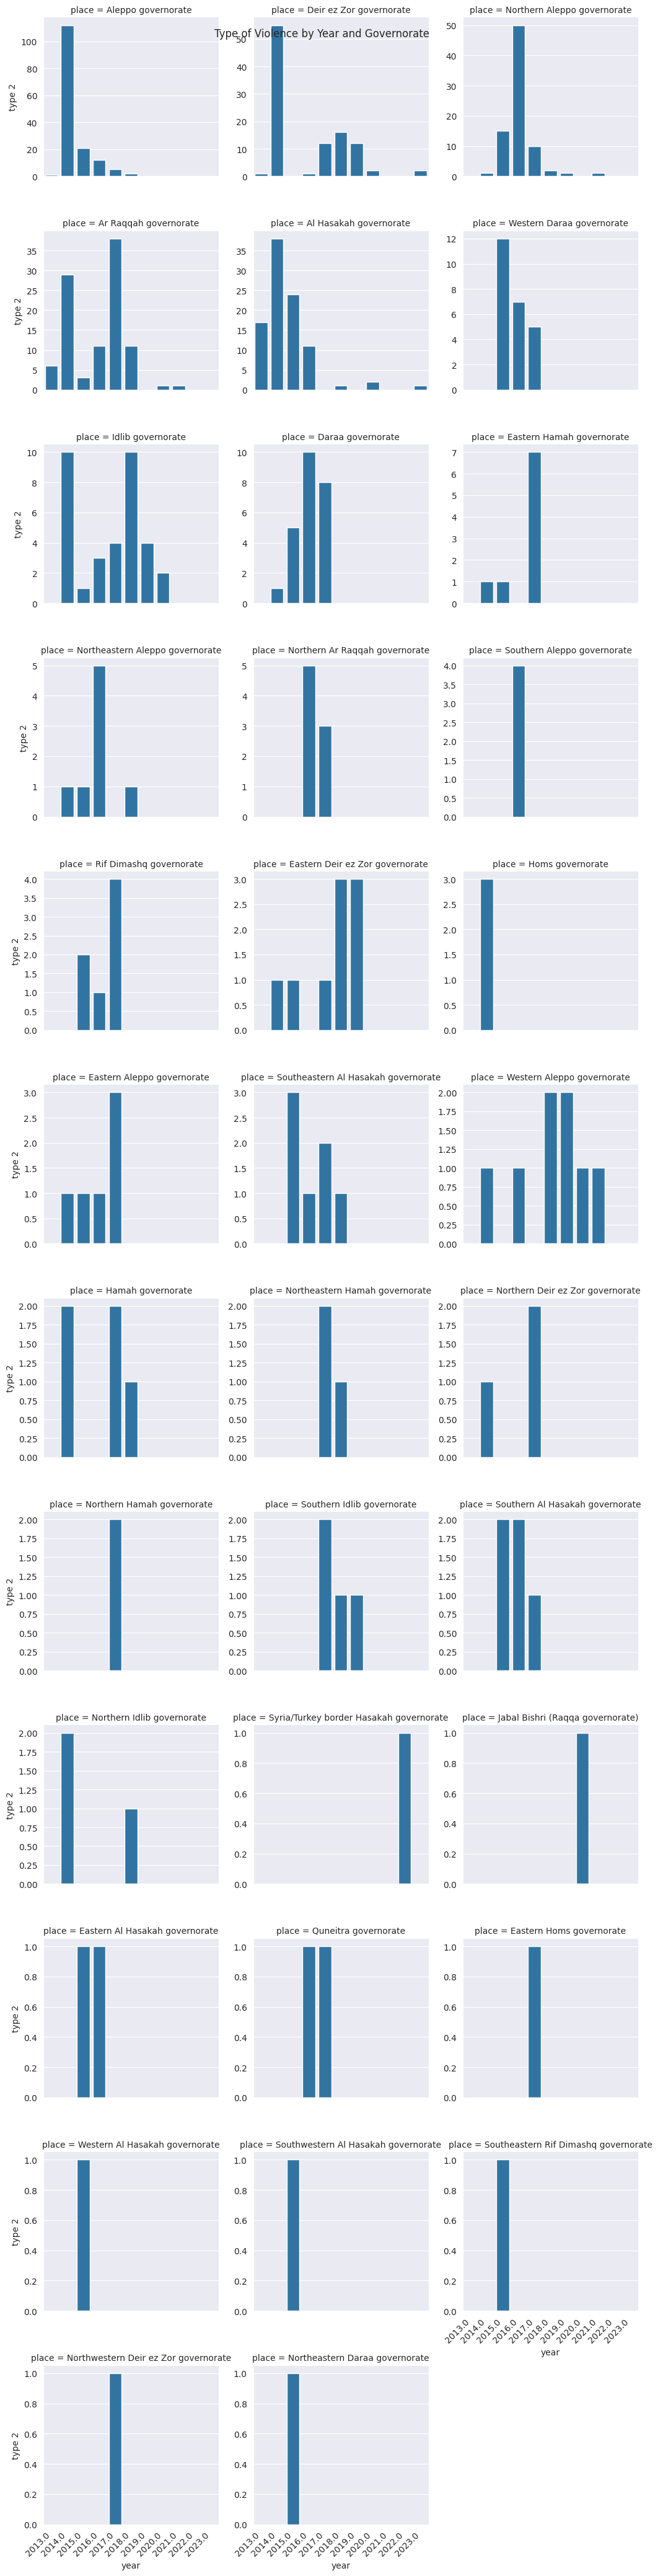

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt


g2 = sns.FacetGrid(typ2_dfyr, col='place', col_wrap=3, height=3.5, sharey=False)


g2.map(sns.barplot, 'year', 'type 2', order=sorted(typ2_dfyr['year'].unique()))

# Rotate x-axis labels for readability
for ax in g2.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment("right")

# Set main title and layout
g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle('Type of Violence by Year and Governorate')

plt.tight_layout()
plt.show()


In [76]:
df_type_3_violence = dates_splt[
    (dates_splt["type_of_violence"] == 3.0) &
    dates_splt["where_coordinates"].str.contains(land_type[0])
    ]

typ3_dfyr = df_type_3_violence.groupby(['year', "where_coordinates"])['type_of_violence'].count().reset_index()

In [77]:
typ3_dfyr

,year,where_coordinates,type_of_violence
0,2011.0,Aleppo governorate,1
1,2011.0,Daraa governorate,14
2,2011.0,Deir ez Zor governorate,11
3,2011.0,Hamah governorate,12
4,2011.0,Homs governorate,22
...,...,...,...
97,2019.0,Deir ez Zor governorate,2
98,2019.0,Eastern Deir ez Zor governorate,1
99,2019.0,Idlib governorate,5
100,2020.0,Idlib governorate,3


In [78]:
typ3_dfyr.sort_values(by="type_of_violence",ascending=False,inplace=True)

In [79]:
typ3_dfyr

,year,where_coordinates,type_of_violence
4,2011.0,Homs governorate,22
49,2015.0,Deir ez Zor governorate,21
5,2011.0,Idlib governorate,19
31,2014.0,Aleppo governorate,16
79,2017.0,Deir ez Zor governorate,16
...,...,...,...
63,2016.0,Aleppo governorate,1
67,2016.0,Eastern Deir ez Zor governorate,1
68,2016.0,Eastern Homs governorate,1
69,2016.0,Hamah governorate,1


In [80]:
typ3_dfyr.rename(columns={"where_coordinates": "place", "type_of_violence":"type3"},inplace=True)

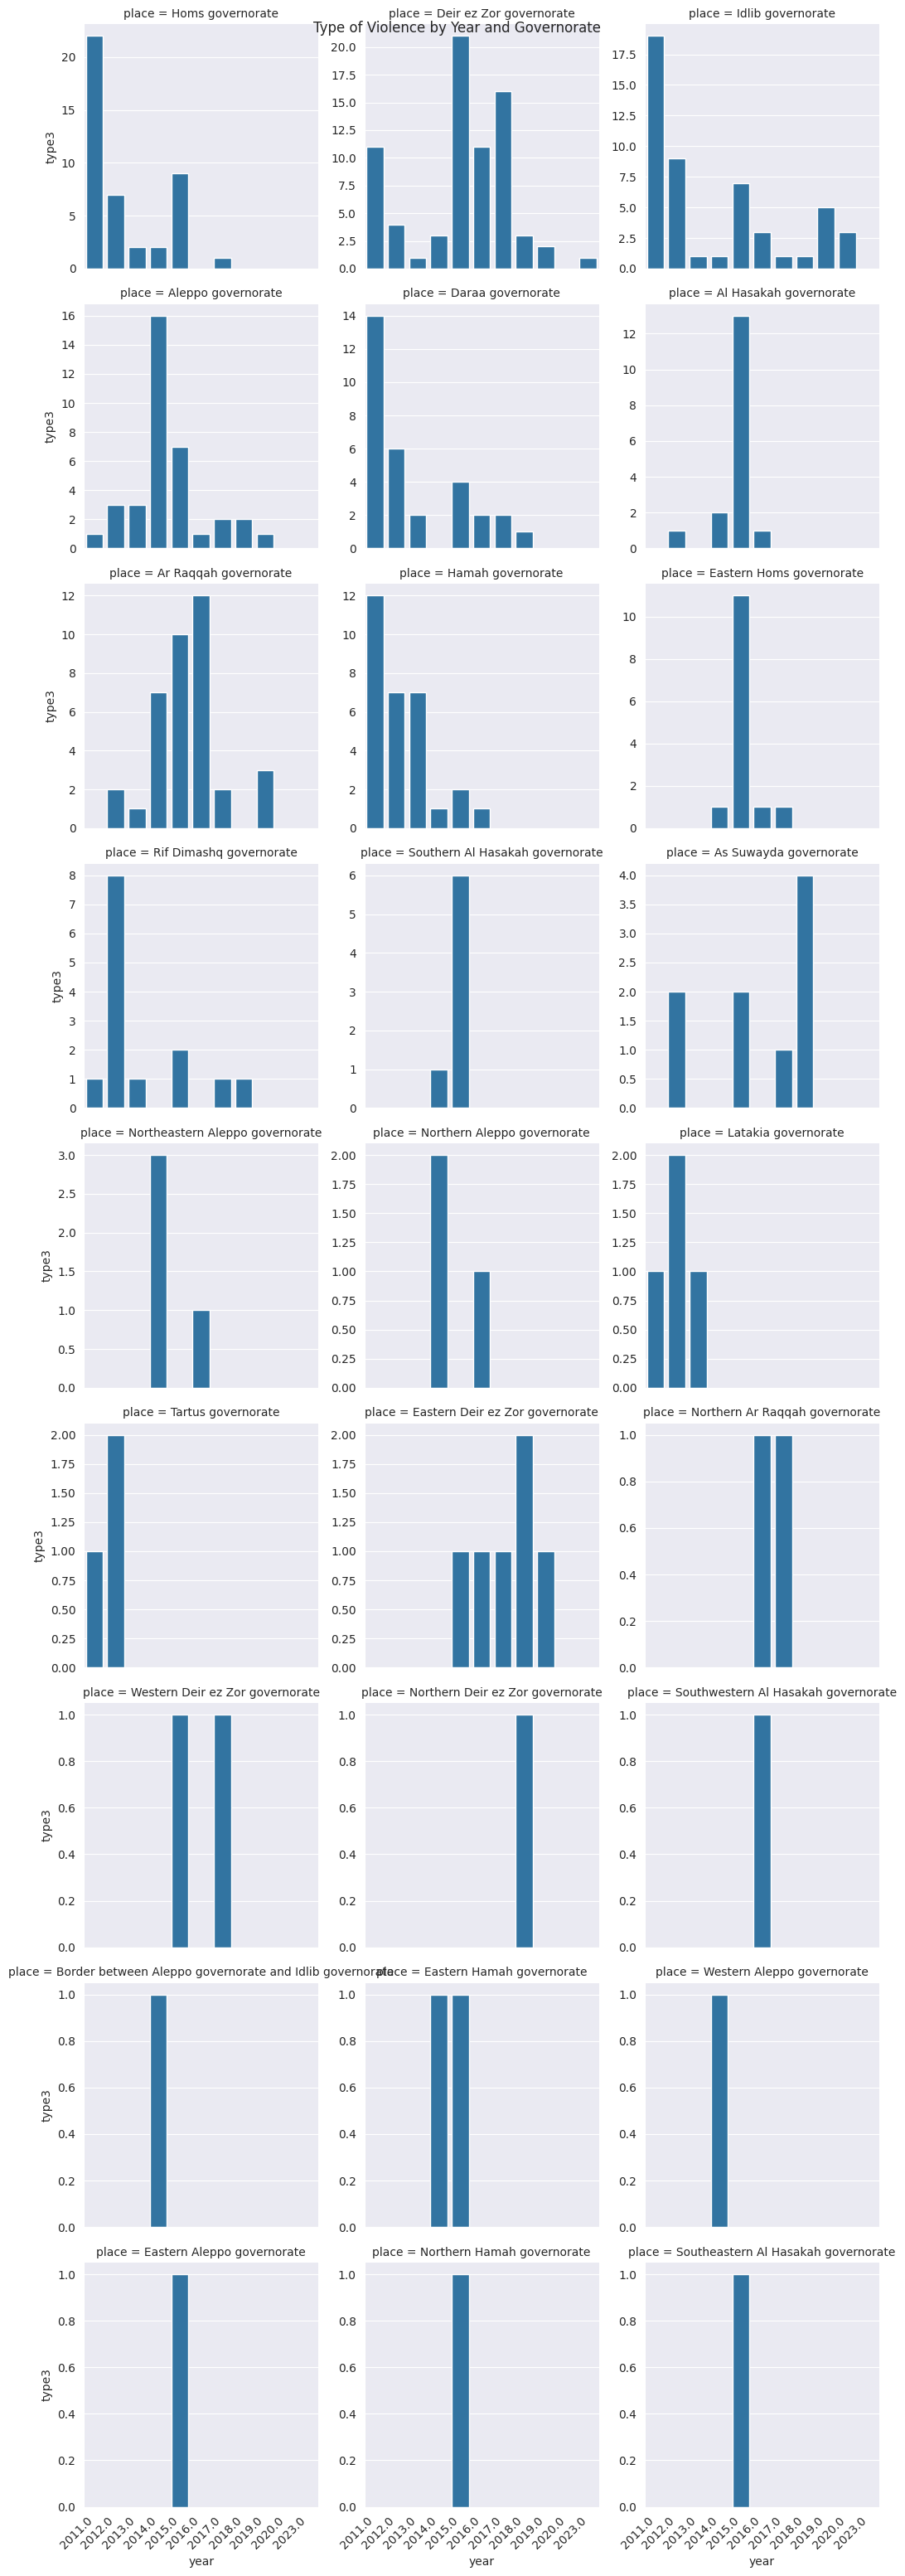

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the FacetGrid
g3 = sns.FacetGrid(typ3_dfyr, col='place', col_wrap=3, height=3.5, sharey=False)

# Map a barplot or lineplot to the grid
g3.map(sns.barplot, 'year', 'type3', order=sorted(typ3_dfyr['year'].unique()))

# Rotate x-axis labels for readability
for ax in g3.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment("right")

# Set main title and layout
g3.fig.subplots_adjust(top=0.9)
g3.fig.suptitle('Type of Violence by Year and Governorate')

plt.tight_layout()
plt.show()

Victim pattern analysis

In [82]:
"""

اربط بين نوع العنف، الأطراف، والموقع مع عدد الضحايا.
هل في نوع عنف مرتبط دائماً بعدد ضحايا أعلى؟
أو أطراف معينة دخولها بالنزاع يزيد من حجم الضحايا؟

"""

'\n\nاربط بين نوع العنف، الأطراف، والموقع مع عدد الضحايا.\nهل في نوع عنف مرتبط دائماً بعدد ضحايا أعلى؟\nأو أطراف معينة دخولها بالنزاع يزيد من حجم الضحايا؟\n\n'

In [104]:
df_type_1_deaths = dates_splt[
    (dates_splt["type_of_violence"] == 1.0) &
    dates_splt["where_coordinates"].str.contains(land_type[0])
    ]

typ1_deaths = df_type_1_deaths.groupby(['year', "where_coordinates"])['best'].sum().reset_index()

In [105]:
typ1_deaths

,year,where_coordinates,best
0,2011.0,Aleppo governorate,1.0
1,2011.0,Daraa governorate,32.0
2,2011.0,Deir ez Zor governorate,12.0
3,2011.0,Hamah governorate,24.0
4,2011.0,Homs governorate,55.0
...,...,...,...
287,2023.0,Idlib governorate,4.0
288,2023.0,Northern Latakia governorate,15.0
289,2023.0,Western Aleppo governorate,6.0
290,2023.0,Western Deir ez Zor governorate,3.0


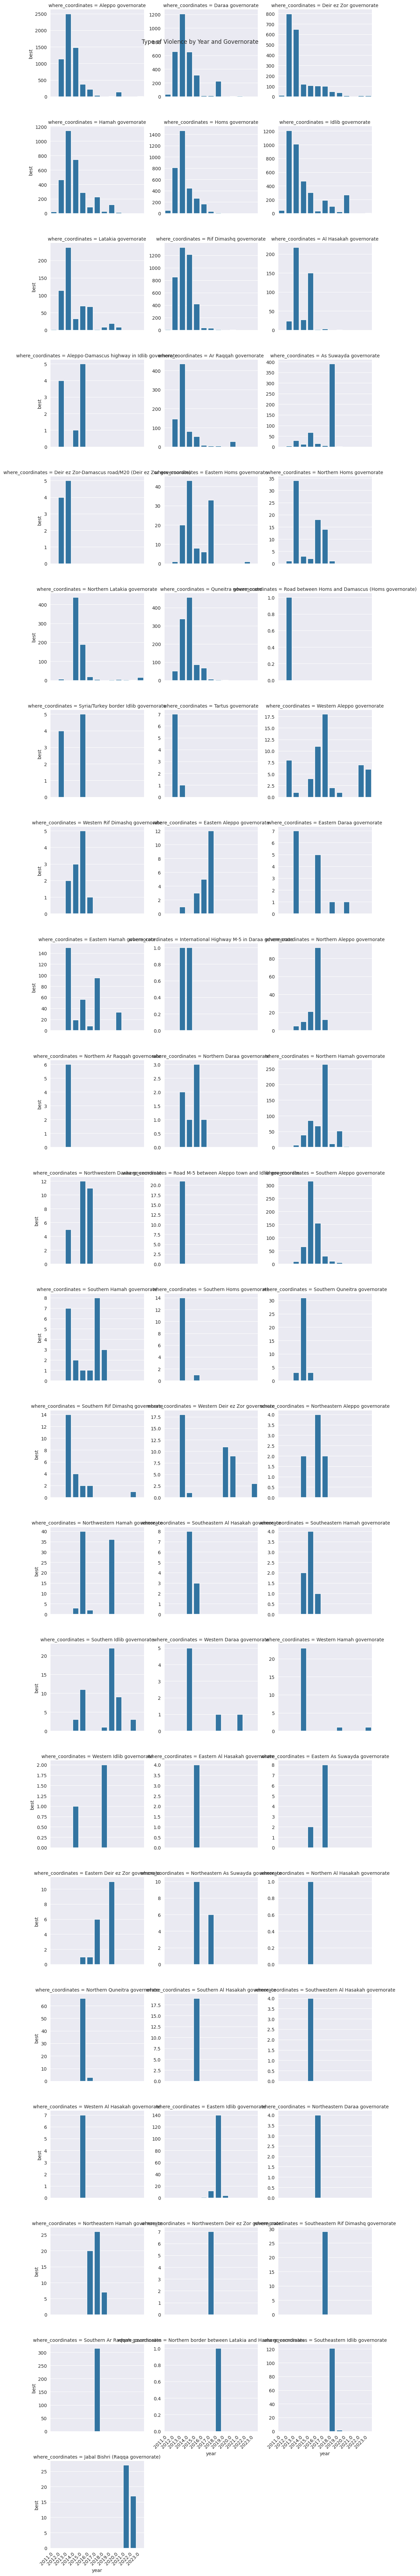

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the FacetGrid
g3 = sns.FacetGrid(typ1_deaths, col='where_coordinates', col_wrap=3, height=3.5, sharey=False)

# Map a barplot or lineplot to the grid
g3.map(sns.barplot, 'year', 'best', order=sorted(typ1_deaths['year'].unique()))

# Rotate x-axis labels for readability
for ax in g3.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment("right")

# Set main title and layout
g3.fig.subplots_adjust(top=0.9)
g3.fig.suptitle('Type of Violence by Year and Governorate')

plt.tight_layout()
plt.show()

In [126]:
df_type_3_deaths = dates_splt[
    (dates_splt["type_of_violence"] == 3.0) &
    dates_splt["where_coordinates"].str.contains(land_type[0])
    ]

typ3_deaths = df_type_3_deaths.groupby(['year', "where_coordinates"])["best"].sum().reset_index()

In [127]:
typ3_deaths

,year,where_coordinates,best
0,2011.0,Aleppo governorate,1.0
1,2011.0,Daraa governorate,38.0
2,2011.0,Deir ez Zor governorate,25.0
3,2011.0,Hamah governorate,18.0
4,2011.0,Homs governorate,74.0
...,...,...,...
97,2019.0,Deir ez Zor governorate,27.0
98,2019.0,Eastern Deir ez Zor governorate,1.0
99,2019.0,Idlib governorate,35.0
100,2020.0,Idlib governorate,5.0


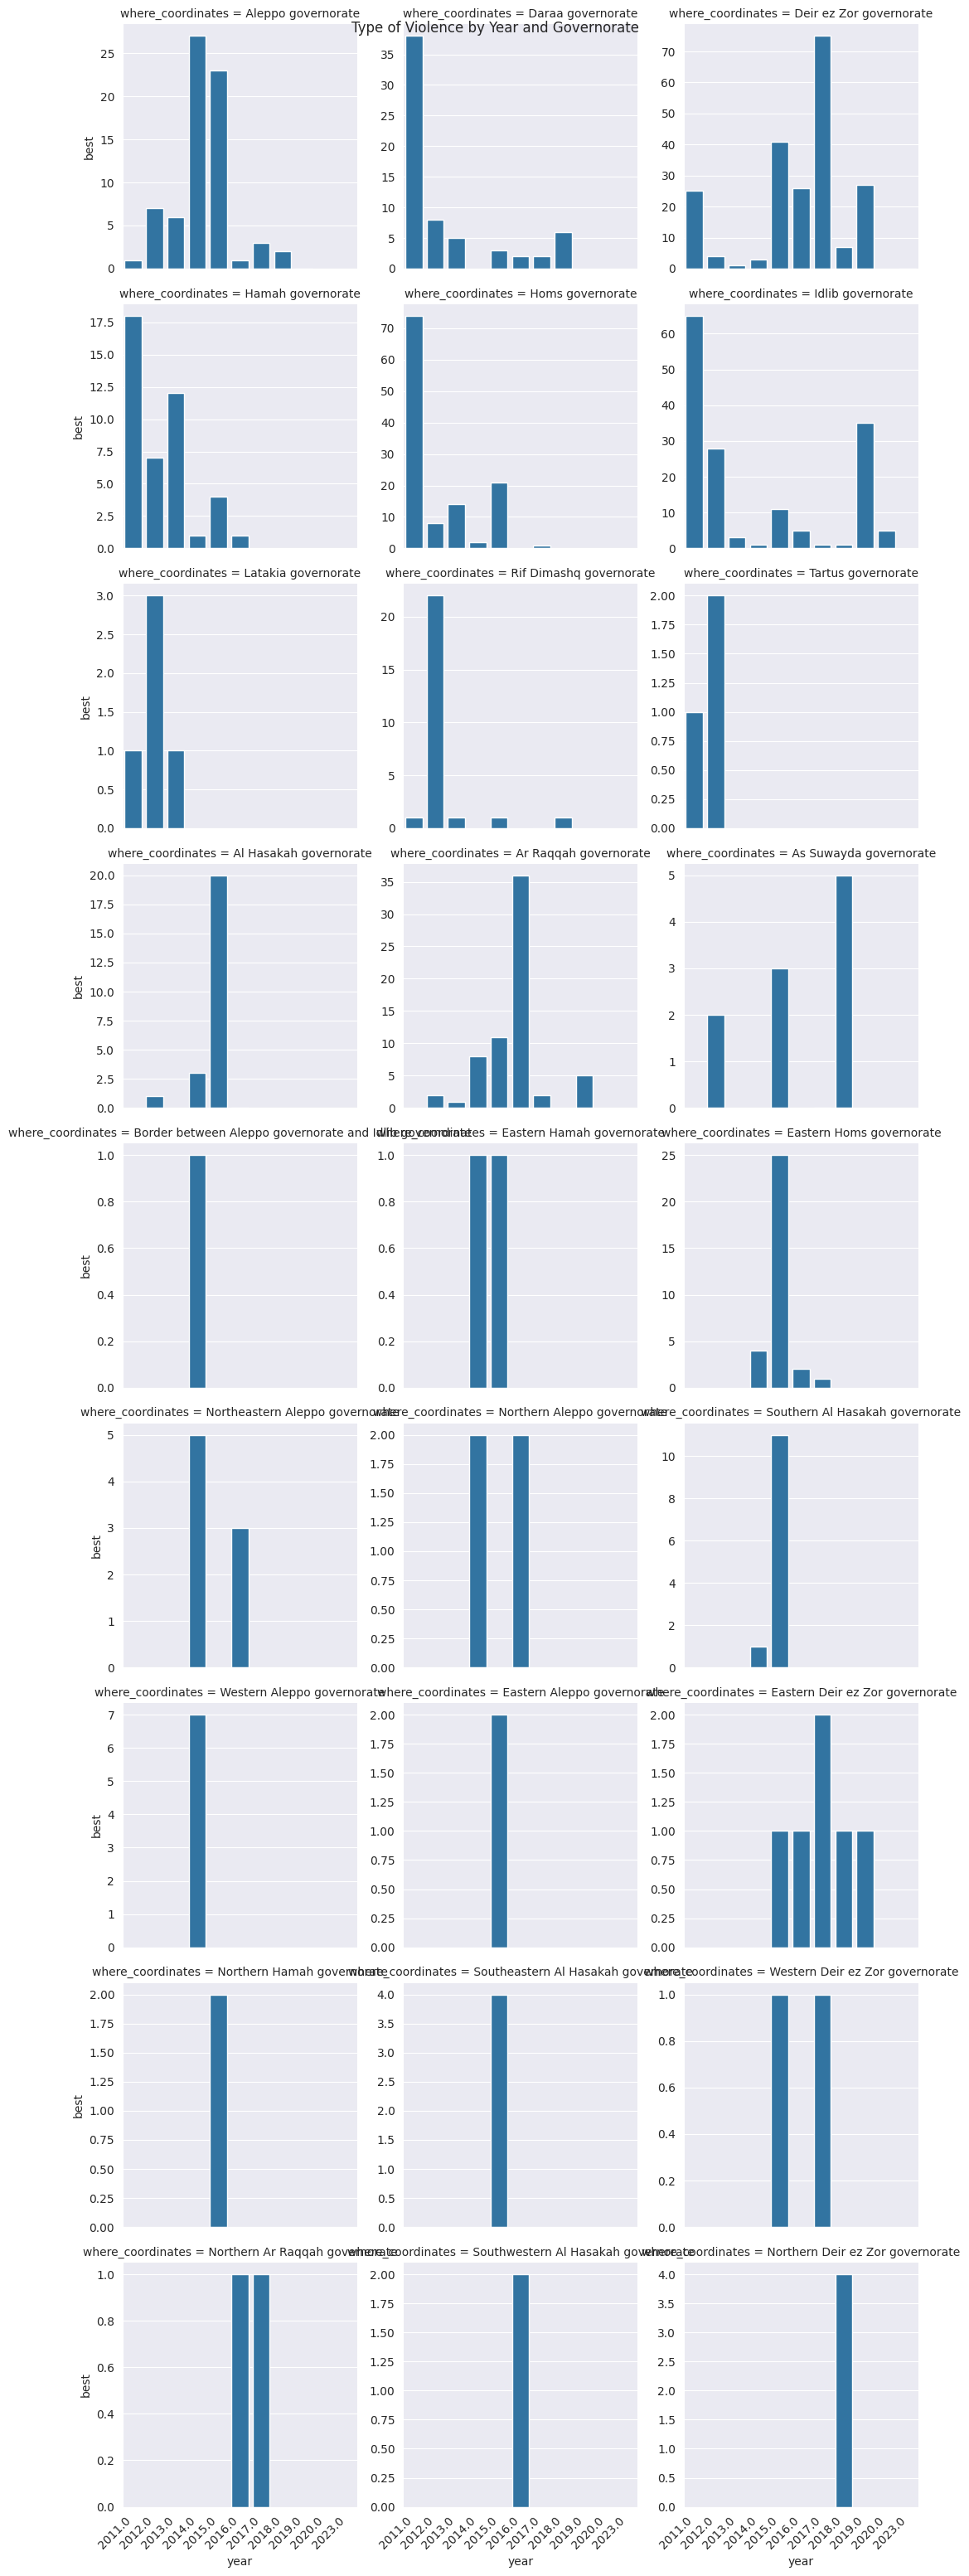

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the FacetGrid
g3 = sns.FacetGrid(typ3_deaths, col='where_coordinates', col_wrap=3, height=3.5, sharey=False)

# Map a barplot or lineplot to the grid
g3.map(sns.barplot, 'year', 'best', order=sorted(typ3_deaths['year'].unique()))

# Rotate x-axis labels for readability
for ax in g3.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment("right")

# Set main title and layout
g3.fig.subplots_adjust(top=0.9)
g3.fig.suptitle('Type of Violence by Year and Governorate')

plt.tight_layout()
plt.show()

In [106]:
df_type_2_deaths = dates_splt[
    (dates_splt["type_of_violence"] == 2.0) &
    dates_splt["where_coordinates"].str.contains(land_type[0])
    ]

typ2deaths_dfyr = df_type_2_deaths.groupby(['year',"where_coordinates"])['best'].sum().reset_index()

In [107]:
typ2deaths_dfyr

,year,where_coordinates,best
0,2013.0,Al Hasakah governorate,51.0
1,2013.0,Aleppo governorate,2.0
2,2013.0,Ar Raqqah governorate,14.0
3,2013.0,Deir ez Zor governorate,2.0
4,2014.0,Al Hasakah governorate,173.0
...,...,...,...
106,2021.0,Northern Aleppo governorate,3.0
107,2021.0,Western Aleppo governorate,2.0
108,2022.0,Syria/Turkey border Hasakah governorate,1.0
109,2023.0,Al Hasakah governorate,1.0


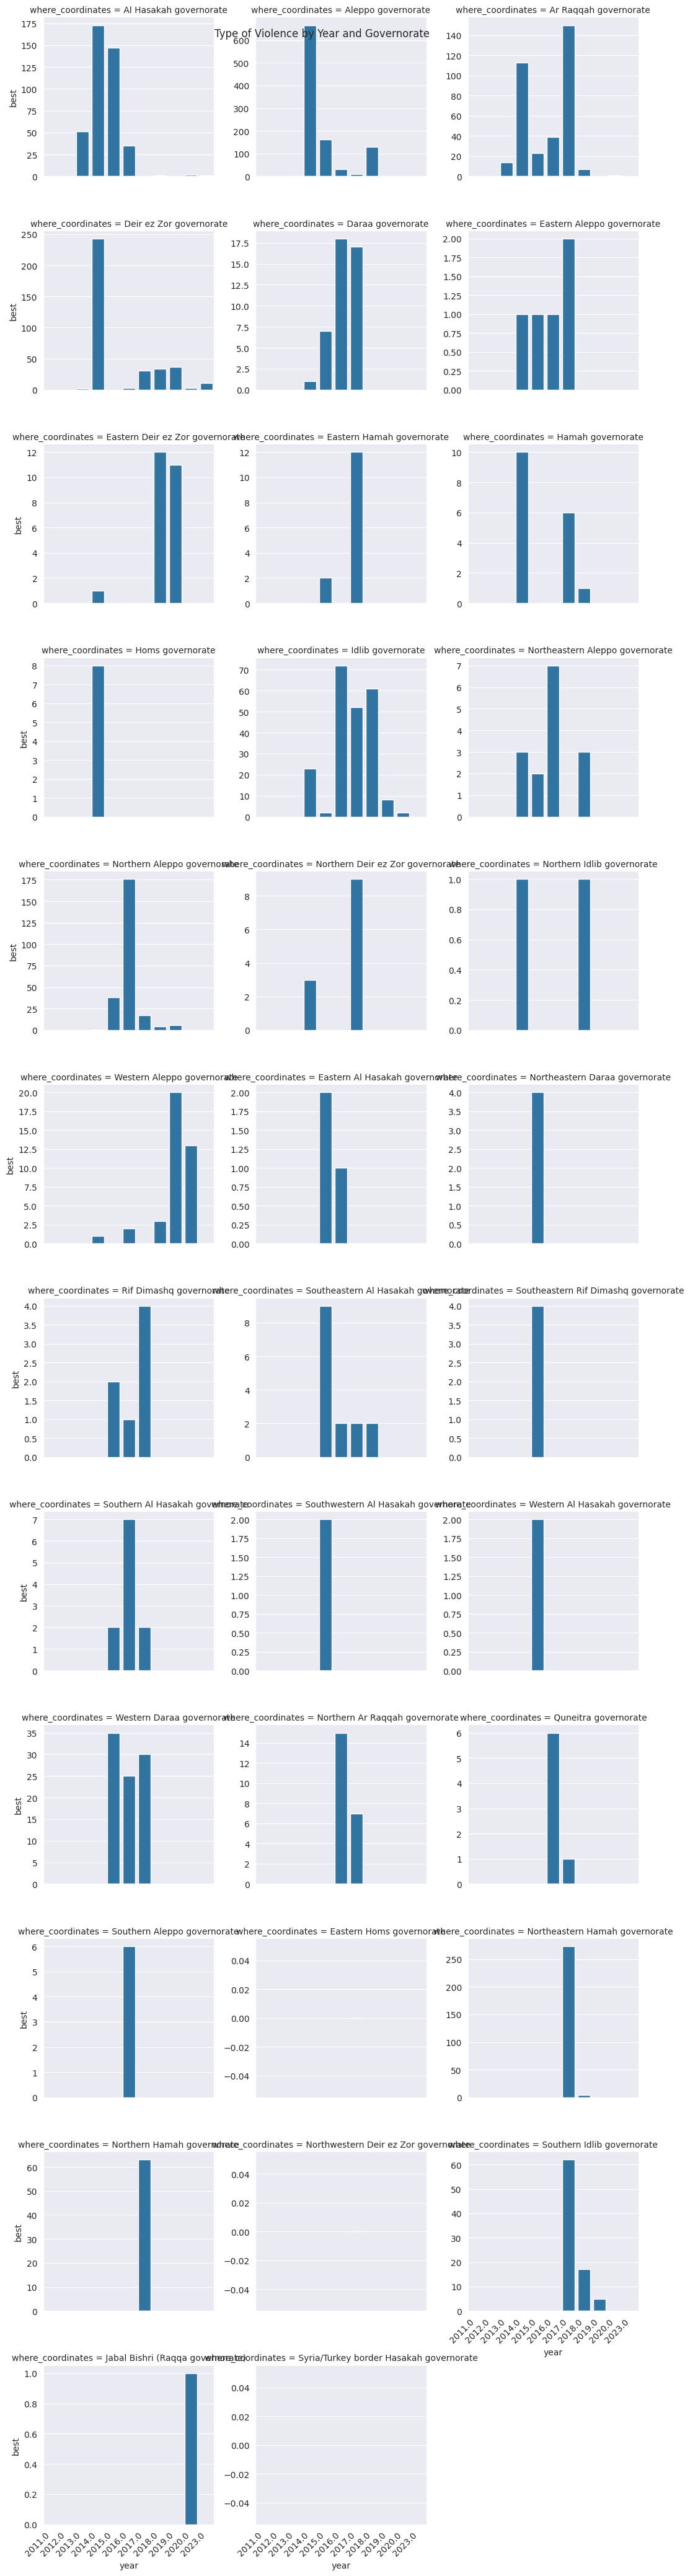

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the FacetGrid
g3 = sns.FacetGrid(typ2deaths_dfyr, col='where_coordinates', col_wrap=3, height=3.5, sharey=False)

# Map a barplot or lineplot to the grid
g3.map(sns.barplot, 'year', 'best', order=sorted(typ3_dfyr['year'].unique()))

# Rotate x-axis labels for readability
for ax in g3.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment("right")

# Set main title and layout
g3.fig.subplots_adjust(top=0.9)
g3.fig.suptitle('Type of Violence by Year and Governorate')

plt.tight_layout()
plt.show()